# Download CMIP6 model data

# Importing all

### Install Essential Libraries needed and Import

In [6]:
# !pip install --upgrade pip
# !pip install esgf-pyclient
# !conda install -c conda-forge esgf-pyclient
# !pip install MyProxyClient==2.1.0

# !conda install -c conda-forge myproxyclient
# !conda install -c conda-forge/label/cf201901 myproxyclient
# !conda install -c conda-forge/label/cf202003 myproxyclient
# !pip install pandas
# !pip install numpy
# !pip install os-sys
# !pip install urllib3
# !pip3 install urllib3

# !conda install -c conda-forge python-cdo
# !pip install cdo
# !conda install -c conda-forge xarray dask netCDF4 bottleneck
# !pip install xarray
# !pip install progressbar

In [7]:
import pandas as pd
import numpy as np
import os

In [103]:
import urllib.parse as urlparse
import urllib.request
import urllib
from urllib import *
import os.path
from os import path
from urllib.error import HTTPError
from urllib.request import HTTPError
#
import progressbar
import urllib3
from urllib import request
from urllib3 import request
from urllib.request import urlretrieve
import IPython
from tqdm.notebook import tqdm as tqdm
# from tqdm import tqdm
# Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
for x in tqdm(range(100)):
    pass
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important; }</style>"))
from pathlib import Path
from glob import glob
import os
from termcolor import colored


from cdo import *   # python version
cdo = Cdo()
import itertools
from os import listdir
from os.path import isfile, join
import re
import glob
import os
import shutil
import time
from functools import wraps
from pyesgf.logon import LogonManager

  0%|          | 0/100 [00:00<?, ?it/s]

### Define retry function

In [9]:
import time
from functools import wraps


def retry(ExceptionToCheck, tries=4, delay=3, backoff=2, logger=None):
    """Retry calling the decorated function using an exponential backoff.

    http://www.saltycrane.com/blog/2009/11/trying-out-retry-decorator-python/
    original from: http://wiki.python.org/moin/PythonDecoratorLibrary#Retry

    :param ExceptionToCheck: the exception to check. may be a tuple of
        exceptions to check
    :type ExceptionToCheck: Exception or tuple
    :param tries: number of times to try (not retry) before giving up
    :type tries: int
    :param delay: initial delay between retries in seconds
    :type delay: int
    :param backoff: backoff multiplier e.g. value of 2 will double the delay
        each retry
    :type backoff: int
    :param logger: logger to use. If None, print
    :type logger: logging.Logger instance
    """
    def deco_retry(f):

        @wraps(f)
        def f_retry(*args, **kwargs):
            mtries, mdelay = tries, delay
            while mtries > 1:
                try:
                    return f(*args, **kwargs)
                except ExceptionToCheck as e:
                    msg = "%s, Retrying in %d seconds..." % (str(e), mdelay)
                    if logger:
                        logger.warning(msg)
                    else:
                        print(msg)
                    time.sleep(mdelay)
                    mtries -= 1
                    mdelay *= backoff
            return f(*args, **kwargs)

        return f_retry  # true decorator

    return deco_retry

# Searching the data in esgf-node.llnl.gov

In [10]:
from pyesgf.logon import LogonManager
lm = LogonManager()
lm.logoff()
lm.is_logged_on() #checking whetherlogged in or not in esgf-node.llnl.gov

False

## Search using keywords

In [11]:
#http://esgf-index1.ceda.ac.uk/esg-search
#https://esgf-node.llnl.gov/search/cmip6/
#https://esgf-data.dkrz.de/esg-search
from pyesgf.search import SearchConnection
conn = SearchConnection('https://esgf-data.dkrz.de/esg-search', distrib=True) # gives results from less data nodes
conn = SearchConnection('https://esgf-node.llnl.gov/esg-search', distrib=True) # gives results from more data nodes


In [12]:
variables=['tos']# for multiple variables-> ['ua','va']
root_fldr= '/media/akash/POSTDOC_WORK/akash_works/DATASET_main/CMIP6/download_unavailable_models_in_hpc/'

Path(f'{root_fldr}merged_data/').mkdir(parents=True, exist_ok=True) # create raw_data and merged_data directories
Path(f'{root_fldr}raw_data/').mkdir(parents=True, exist_ok=True)


In [13]:
backup_file_name=f"CMIP6_multivar_{(',').join(variables)}_links-historical.txt" # here we will save all the links to downlad models
# backup_file_name=f"temp.txt" # here we will save all the links to downlad models

print(backup_file_name)

CMIP6_multivar_ua,va_links-historical.txt


In [90]:
ctx = conn.new_context(project='CMIP6', variable=(',').join(variables),# for multiple variables use like this- 'tas,pr'
                       experiment_id='historical',
                       product='model-output',
                       frequency='mon',
                       table_id='Omon',
                       grid_label='gn,gr',
                       source_id='ACCESS-ESM1-5',# for multiple models-> 'BCC-CSM2-MR,CESM2,FGOALS-g3,GFDL-CM4,GFDL-ESM4,GISS-E2-1-G',
                       #from_timestamp="1950-01-01T00:00:01Z", to_timestamp="2020-01-01T00:00:00Z",
                       #nominal_resolution='50 km,250 km,100 km',
                       variant_label='r1i1p1f1,r2i1p1f1,r3i1p1f1',
#                        data_node='esgf3.dkrz.de',
#                        data_node='esgf-index1.ceda.ac.uk',#['esgf-data1.llnl.gov', 'aims3.llnl.gov', 'cmip.bcc.cma.cn', 'esgf-data.ucar.edu', 'dpesgf03.nccs.nasa.gov', 'esg.lasg.ac.cn', 'esgf-data04.diasjp.net', 'esgf3.dkrz.de', 'esgf.ceda.ac.uk', 'esgf.nci.org.au']
                       
                       #replica=False,
#                        facets='project,experiment_id',
                       latest=True
                      )
print('Hits:', ctx.hit_count)
print('table_id:', ctx.facet_counts['table_id'])

print('variables:', ctx.facet_counts['variable'])
print('Realms:', ctx.facet_counts['realm'])
print('Ensembles:', ctx.facet_counts['variant_label'])
print('Models:', ctx.facet_counts['source_id'])
print('grid_label:', ctx.facet_counts['grid_label'])
print('experiment_id:', ctx.facet_counts['experiment_id'])

# print('nominal resolution:', ctx.facet_counts['nominal_resolution'])
# hits means number of models or results
# each hits contains lot of files


-------------------------------------------------------------------------------
Warning - defaulting to search with facets=*

This behavior is kept for backward-compatibility, but ESGF indexes might not
successfully perform a distributed search when this option is used, so some
results may be missing.  For full results, it is recommended to pass a list of
facets of interest when instantiating a context object.  For example,

      ctx = conn.new_context(facets='project,experiment_id')

Only the facets that you specify will be present in the facets_counts dictionary.

This warning is displayed when a distributed search is performed while using the
facets=* default, a maximum of once per context object.  To suppress this warning,
set the environment variable ESGF_PYCLIENT_NO_FACETS_STAR_WARNING to any value
or explicitly use  conn.new_context(facets='*')

-------------------------------------------------------------------------------


Hits: 14
table_id: {'Omon': 14}
variables: {'tos': 14}
Realms: {'ocean': 14}
Ensembles: {'r3i1p1f1': 4, 'r2i1p1f1': 5, 'r1i1p1f1': 5}
Models: {'ACCESS-ESM1-5': 14}
grid_label: {'gn': 14}
experiment_id: {'historical': 14}


<h1 style='font-size:3rem;color:red;'> Extracting download URL from search result and appending to a list </h1>


## Each hit contains lot of files and each of them having a URL

In [91]:
df =[]
total_links = []
hit = int(ctx.hit_count)


print(len(ctx.search()))
## if crashed the appending in between, can continue from hereby changing the '0' 
# for i in range(0, 10, 1): # Just for checking 
for i in tqdm(range(0, hit, 1)):
    ds = ctx.search()[i] # i th hit or i th result
    files = ds.file_context().search() # finding files from hit
    len(files)
    print(i)
    for f in files:
        kk = str(f.download_url) # extracting URL's of all files
        #print(kk)
        df += [kk] #appending to list df
    
    print(float(((i+1)/hit)*100), '% of links appended to the list')
print('#############################################')
print('#                                           #')
print('#       Completed appending links 100%      #')
print('#                                           #')
print('#############################################')
print('')


14


  0%|          | 0/14 [00:00<?, ?it/s]


-------------------------------------------------------------------------------
Warning - defaulting to search with facets=*

This behavior is kept for backward-compatibility, but ESGF indexes might not
successfully perform a distributed search when this option is used, so some
results may be missing.  For full results, it is recommended to pass a list of
facets of interest when instantiating a context object.  For example,

      ctx = conn.new_context(facets='project,experiment_id')

Only the facets that you specify will be present in the facets_counts dictionary.

This warning is displayed when a distributed search is performed while using the
facets=* default, a maximum of once per context object.  To suppress this warning,
set the environment variable ESGF_PYCLIENT_NO_FACETS_STAR_WARNING to any value
or explicitly use  conn.new_context(facets='*')

-------------------------------------------------------------------------------


0
7.142857142857142 % of links appended to the list



-------------------------------------------------------------------------------
Warning - defaulting to search with facets=*

This behavior is kept for backward-compatibility, but ESGF indexes might not
successfully perform a distributed search when this option is used, so some
results may be missing.  For full results, it is recommended to pass a list of
facets of interest when instantiating a context object.  For example,

      ctx = conn.new_context(facets='project,experiment_id')

Only the facets that you specify will be present in the facets_counts dictionary.

This warning is displayed when a distributed search is performed while using the
facets=* default, a maximum of once per context object.  To suppress this warning,
set the environment variable ESGF_PYCLIENT_NO_FACETS_STAR_WARNING to any value
or explicitly use  conn.new_context(facets='*')

-------------------------------------------------------------------------------


1
14.285714285714285 % of links appended to the list



-------------------------------------------------------------------------------
Warning - defaulting to search with facets=*

This behavior is kept for backward-compatibility, but ESGF indexes might not
successfully perform a distributed search when this option is used, so some
results may be missing.  For full results, it is recommended to pass a list of
facets of interest when instantiating a context object.  For example,

      ctx = conn.new_context(facets='project,experiment_id')

Only the facets that you specify will be present in the facets_counts dictionary.

This warning is displayed when a distributed search is performed while using the
facets=* default, a maximum of once per context object.  To suppress this warning,
set the environment variable ESGF_PYCLIENT_NO_FACETS_STAR_WARNING to any value
or explicitly use  conn.new_context(facets='*')

-------------------------------------------------------------------------------


2
21.428571428571427 % of links appended to the list



-------------------------------------------------------------------------------
Warning - defaulting to search with facets=*

This behavior is kept for backward-compatibility, but ESGF indexes might not
successfully perform a distributed search when this option is used, so some
results may be missing.  For full results, it is recommended to pass a list of
facets of interest when instantiating a context object.  For example,

      ctx = conn.new_context(facets='project,experiment_id')

Only the facets that you specify will be present in the facets_counts dictionary.

This warning is displayed when a distributed search is performed while using the
facets=* default, a maximum of once per context object.  To suppress this warning,
set the environment variable ESGF_PYCLIENT_NO_FACETS_STAR_WARNING to any value
or explicitly use  conn.new_context(facets='*')

-------------------------------------------------------------------------------


3
28.57142857142857 % of links appended to the list



-------------------------------------------------------------------------------
Warning - defaulting to search with facets=*

This behavior is kept for backward-compatibility, but ESGF indexes might not
successfully perform a distributed search when this option is used, so some
results may be missing.  For full results, it is recommended to pass a list of
facets of interest when instantiating a context object.  For example,

      ctx = conn.new_context(facets='project,experiment_id')

Only the facets that you specify will be present in the facets_counts dictionary.

This warning is displayed when a distributed search is performed while using the
facets=* default, a maximum of once per context object.  To suppress this warning,
set the environment variable ESGF_PYCLIENT_NO_FACETS_STAR_WARNING to any value
or explicitly use  conn.new_context(facets='*')

-------------------------------------------------------------------------------


4
35.714285714285715 % of links appended to the list



-------------------------------------------------------------------------------
Warning - defaulting to search with facets=*

This behavior is kept for backward-compatibility, but ESGF indexes might not
successfully perform a distributed search when this option is used, so some
results may be missing.  For full results, it is recommended to pass a list of
facets of interest when instantiating a context object.  For example,

      ctx = conn.new_context(facets='project,experiment_id')

Only the facets that you specify will be present in the facets_counts dictionary.

This warning is displayed when a distributed search is performed while using the
facets=* default, a maximum of once per context object.  To suppress this warning,
set the environment variable ESGF_PYCLIENT_NO_FACETS_STAR_WARNING to any value
or explicitly use  conn.new_context(facets='*')

-------------------------------------------------------------------------------


5
42.857142857142854 % of links appended to the list



-------------------------------------------------------------------------------
Warning - defaulting to search with facets=*

This behavior is kept for backward-compatibility, but ESGF indexes might not
successfully perform a distributed search when this option is used, so some
results may be missing.  For full results, it is recommended to pass a list of
facets of interest when instantiating a context object.  For example,

      ctx = conn.new_context(facets='project,experiment_id')

Only the facets that you specify will be present in the facets_counts dictionary.

This warning is displayed when a distributed search is performed while using the
facets=* default, a maximum of once per context object.  To suppress this warning,
set the environment variable ESGF_PYCLIENT_NO_FACETS_STAR_WARNING to any value
or explicitly use  conn.new_context(facets='*')

-------------------------------------------------------------------------------


6
50.0 % of links appended to the list



-------------------------------------------------------------------------------
Warning - defaulting to search with facets=*

This behavior is kept for backward-compatibility, but ESGF indexes might not
successfully perform a distributed search when this option is used, so some
results may be missing.  For full results, it is recommended to pass a list of
facets of interest when instantiating a context object.  For example,

      ctx = conn.new_context(facets='project,experiment_id')

Only the facets that you specify will be present in the facets_counts dictionary.

This warning is displayed when a distributed search is performed while using the
facets=* default, a maximum of once per context object.  To suppress this warning,
set the environment variable ESGF_PYCLIENT_NO_FACETS_STAR_WARNING to any value
or explicitly use  conn.new_context(facets='*')

-------------------------------------------------------------------------------


7
57.14285714285714 % of links appended to the list



-------------------------------------------------------------------------------
Warning - defaulting to search with facets=*

This behavior is kept for backward-compatibility, but ESGF indexes might not
successfully perform a distributed search when this option is used, so some
results may be missing.  For full results, it is recommended to pass a list of
facets of interest when instantiating a context object.  For example,

      ctx = conn.new_context(facets='project,experiment_id')

Only the facets that you specify will be present in the facets_counts dictionary.

This warning is displayed when a distributed search is performed while using the
facets=* default, a maximum of once per context object.  To suppress this warning,
set the environment variable ESGF_PYCLIENT_NO_FACETS_STAR_WARNING to any value
or explicitly use  conn.new_context(facets='*')

-------------------------------------------------------------------------------


8
64.28571428571429 % of links appended to the list



-------------------------------------------------------------------------------
Warning - defaulting to search with facets=*

This behavior is kept for backward-compatibility, but ESGF indexes might not
successfully perform a distributed search when this option is used, so some
results may be missing.  For full results, it is recommended to pass a list of
facets of interest when instantiating a context object.  For example,

      ctx = conn.new_context(facets='project,experiment_id')

Only the facets that you specify will be present in the facets_counts dictionary.

This warning is displayed when a distributed search is performed while using the
facets=* default, a maximum of once per context object.  To suppress this warning,
set the environment variable ESGF_PYCLIENT_NO_FACETS_STAR_WARNING to any value
or explicitly use  conn.new_context(facets='*')

-------------------------------------------------------------------------------


9
71.42857142857143 % of links appended to the list



-------------------------------------------------------------------------------
Warning - defaulting to search with facets=*

This behavior is kept for backward-compatibility, but ESGF indexes might not
successfully perform a distributed search when this option is used, so some
results may be missing.  For full results, it is recommended to pass a list of
facets of interest when instantiating a context object.  For example,

      ctx = conn.new_context(facets='project,experiment_id')

Only the facets that you specify will be present in the facets_counts dictionary.

This warning is displayed when a distributed search is performed while using the
facets=* default, a maximum of once per context object.  To suppress this warning,
set the environment variable ESGF_PYCLIENT_NO_FACETS_STAR_WARNING to any value
or explicitly use  conn.new_context(facets='*')

-------------------------------------------------------------------------------


10
78.57142857142857 % of links appended to the list



-------------------------------------------------------------------------------
Warning - defaulting to search with facets=*

This behavior is kept for backward-compatibility, but ESGF indexes might not
successfully perform a distributed search when this option is used, so some
results may be missing.  For full results, it is recommended to pass a list of
facets of interest when instantiating a context object.  For example,

      ctx = conn.new_context(facets='project,experiment_id')

Only the facets that you specify will be present in the facets_counts dictionary.

This warning is displayed when a distributed search is performed while using the
facets=* default, a maximum of once per context object.  To suppress this warning,
set the environment variable ESGF_PYCLIENT_NO_FACETS_STAR_WARNING to any value
or explicitly use  conn.new_context(facets='*')

-------------------------------------------------------------------------------


11
85.71428571428571 % of links appended to the list



-------------------------------------------------------------------------------
Warning - defaulting to search with facets=*

This behavior is kept for backward-compatibility, but ESGF indexes might not
successfully perform a distributed search when this option is used, so some
results may be missing.  For full results, it is recommended to pass a list of
facets of interest when instantiating a context object.  For example,

      ctx = conn.new_context(facets='project,experiment_id')

Only the facets that you specify will be present in the facets_counts dictionary.

This warning is displayed when a distributed search is performed while using the
facets=* default, a maximum of once per context object.  To suppress this warning,
set the environment variable ESGF_PYCLIENT_NO_FACETS_STAR_WARNING to any value
or explicitly use  conn.new_context(facets='*')

-------------------------------------------------------------------------------


12
92.85714285714286 % of links appended to the list



-------------------------------------------------------------------------------
Warning - defaulting to search with facets=*

This behavior is kept for backward-compatibility, but ESGF indexes might not
successfully perform a distributed search when this option is used, so some
results may be missing.  For full results, it is recommended to pass a list of
facets of interest when instantiating a context object.  For example,

      ctx = conn.new_context(facets='project,experiment_id')

Only the facets that you specify will be present in the facets_counts dictionary.

This warning is displayed when a distributed search is performed while using the
facets=* default, a maximum of once per context object.  To suppress this warning,
set the environment variable ESGF_PYCLIENT_NO_FACETS_STAR_WARNING to any value
or explicitly use  conn.new_context(facets='*')

-------------------------------------------------------------------------------


13
100.0 % of links appended to the list
#############################################
#                                           #
#       Completed appending links 100%      #
#                                           #
#############################################



In [96]:
df

['http://esgf-data1.llnl.gov/thredds/fileServer/css03_data/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/historical/r1i1p1f1/Omon/tos/gn/v20191115/tos_Omon_ACCESS-ESM1-5_historical_r1i1p1f1_gn_185001-201412.nc',
 'http://esgf-data1.llnl.gov/thredds/fileServer/css03_data/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/historical/r2i1p1f1/Omon/tos/gn/v20191128/tos_Omon_ACCESS-ESM1-5_historical_r2i1p1f1_gn_185001-201412.nc',
 'http://esgf-data1.llnl.gov/thredds/fileServer/css03_data/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/historical/r3i1p1f1/Omon/tos/gn/v20191203/tos_Omon_ACCESS-ESM1-5_historical_r3i1p1f1_gn_185001-201412.nc',
 'http://esgf-data04.diasjp.net/thredds/fileServer/esg_dataroot/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/historical/r1i1p1f1/Omon/tos/gn/v20191115/tos_Omon_ACCESS-ESM1-5_historical_r1i1p1f1_gn_185001-201412.nc',
 'http://esgf-data04.diasjp.net/thredds/fileServer/esg_dataroot/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/historical/r2i1p1f1/Omon/tos/gn/v20191128/tos_Omon_ACCESS-ESM1-5_historical_r2i1p1f1_gn_185001-201412.nc',
 'htt

## links saving to a txt file

In [97]:
#print(len(total_links))
print(len(df))
print(type(df[0]))
print(df[0])

14
<class 'str'>
http://esgf-data1.llnl.gov/thredds/fileServer/css03_data/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/historical/r1i1p1f1/Omon/tos/gn/v20191115/tos_Omon_ACCESS-ESM1-5_historical_r1i1p1f1_gn_185001-201412.nc


In [98]:
ff=open(backup_file_name,'w')
for i in df:
    ff.write(i+'\n')# opening a txt file and saving into it.
ff.close()

In [100]:
temp=[]
for kk in df:
    temp.append(kk.split('/')[2])
temp
temp = list(dict.fromkeys(temp))
print("\x1b[31m\'these are the nodes you are going to download'\x1b[0m",temp)

'these are the nodes you are going to download' ['esgf-data1.llnl.gov', 'esgf-data04.diasjp.net', 'esgf3.dkrz.de', 'esgf.ceda.ac.uk', 'esgf.nci.org.au']


<h1 style='font-size:3rem;color:red;'> Continue From Here Onwards</h1>


All the above shells you need to do only once

In [107]:
df_backup=[]
f = open(backup_file_name, "r")
for line in f:
    stripped_line = line.strip()
    line_list = stripped_line.split()
    df_backup.append(stripped_line) # opening that txt file and appending to df_backup
f.close()

In [108]:
df_backup

['http://esgf-data1.llnl.gov/thredds/fileServer/css03_data/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/historical/r1i1p1f1/Omon/tos/gn/v20191115/tos_Omon_ACCESS-ESM1-5_historical_r1i1p1f1_gn_185001-201412.nc',
 'http://esgf-data1.llnl.gov/thredds/fileServer/css03_data/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/historical/r2i1p1f1/Omon/tos/gn/v20191128/tos_Omon_ACCESS-ESM1-5_historical_r2i1p1f1_gn_185001-201412.nc',
 'http://esgf-data1.llnl.gov/thredds/fileServer/css03_data/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/historical/r3i1p1f1/Omon/tos/gn/v20191203/tos_Omon_ACCESS-ESM1-5_historical_r3i1p1f1_gn_185001-201412.nc',
 'http://esgf-data04.diasjp.net/thredds/fileServer/esg_dataroot/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/historical/r1i1p1f1/Omon/tos/gn/v20191115/tos_Omon_ACCESS-ESM1-5_historical_r1i1p1f1_gn_185001-201412.nc',
 'http://esgf-data04.diasjp.net/thredds/fileServer/esg_dataroot/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/historical/r2i1p1f1/Omon/tos/gn/v20191128/tos_Omon_ACCESS-ESM1-5_historical_r2i1p1f1_gn_185001-201412.nc',
 'htt

In [109]:
# completely optional- if you need to avoide downloading some years or time period(1970-2005)


min_period=197001 # give minimum and maximum period (time-period) we need to download
max_period=202012 # give minimum and maximum period (time-period) we need to download

new_list=[]
kk= len(df_backup)
for url in df_backup:
    fname=url.split('/')[-1] # splitting file name from url
    yr_min=int(fname.split('_')[-1].split('-')[0])                 #;print(yr_min) # split timeperiod of nc file
    yr_max=int(fname.split('_')[-1].split('-')[-1].split('.')[0])  #;print(yr_max)
    
    
    if (yr_min>max_period) or (yr_max<min_period): # if file is not inside our time period
        new_list.append(url) #appending to another list

        
    else:
        print(yr_min,' to ',yr_max)
# print(new_list)



def Diff(li1, li2): # function to subtract one list from another
    return list(set(li1) - set(li2)) + list(set(li2) - set(li1))
df_backup= Diff(df_backup,new_list) #modifying the list of links
print(f'Now we have {len(df_backup)} number of files out of {kk} in between {min_period} and {max_period}')

185001  to  201412
185001  to  201412
185001  to  201412
185001  to  201412
185001  to  201412
185001  to  201412
185001  to  201412
185001  to  201412
185001  to  201412
185001  to  201412
185001  to  201412
185001  to  201412
185001  to  201412
185001  to  201412
Now we have 14 number of files out of 14 in between 197001 and 202012


In [110]:
print(f'Now we have {len(df_backup)} number of files out of {kk} in between {min_period} and {max_period}')

Now we have 14 number of files out of 14 in between 197001 and 202012


<h1 style='font-size:3rem;color:red;'>Data Downloading shell ## Engine of Script</h1>

# Data Downloading shell ## Engine of Script

In [112]:
count_row = len(df_backup)

##############################################3
from joblib import Parallel, delayed #Libraries for parallel processing
import multiprocessing

#inputs = range(count_row) 

inputs = range(count_row) 
def processInput(i): # define a function to put into parallel processing
    url = df_backup[i]
    
    

    
    
############################################
#           splitting foldrs               #
############################################
    spl = urlparse.urlsplit(url)

    fname = spl.path.split("/")[-1]   #splitting filename from URL
    fname = fname.rstrip("\n")
#    fname = fname.lstrip("\n")
#    print(fname)
    
    kp = urlparse.urlsplit(fname)
    ##############


    freq = kp.path.split("_")[1] ####extracting time frquency from URL
#    print('freq folder is ',freq)
    
    model = kp.path.split("_")[-5]  #extracting model name
#    print('model is ',model)
    
    ensemble = kp.path.split("_")[-3]    #extracting ensemble folder
#    print('ensemble folder is ',ensemble)    

    var = kp.path.split("_")[0]
#    print('variable folder is ',var)

    grid = kp.path.split("_")[-2] ####extracting grid
#    print('grid is ', grid)


    scenario = kp.path.split("_")[-4]    #extracrting scenario 
#    print('scenario folder is ',scenario)

    folder = model +'_'+scenario+'_'+ ensemble +'_'+ grid
#    print(folder)


 


    directory = f'/media/akash/POSTDOC_WORK/akash_works/DATASET_main/CMIP6/download_unavailable_models_in_hpc/raw_data/{freq}/{var}/{scenario}/{model}/';Path(directory).mkdir(parents=True, exist_ok=True)
#    print(directory)

    filename = directory+fname
    
    print('#############################')
    print('#  Now downloading',i, 'th URL   #')
    print('#############################')
    print(url)
    
    
#####################################
##        Engine of script         ##
#####################################
    
    if path.exists(filename):
        try:
            @retry(urllib.error.URLError, tries=2, delay=3, backoff=2)
            def link_details(): #defining function to find detailes of link
                url1 = urllib.request.urlopen(url)
                global siz
                siz=int(url1.info()['Content-Length'])#size of file to be downloaded
            link_details()
            if int(os.path.getsize(filename)) == siz: #if a file exists and the file size is similar to the file to downloaded
                print('#############################')
                print('#',i,'th link~ ','file exists #')
                print('#############################')
                pass
            else:# if file existes but size is not similar (means file downloading crashed in between)
                try:
                    @retry(urllib.error.URLError, tries=2, delay=3, backoff=2)
                    def urlopen_with_retry(): # defining file downloading function with retry
                        return urlretrieve(url,filename)
                    urlopen_with_retry()# calling file downloading function
                    print(colored('##########################################', 'red'))
                    print(colored('#  ',i,'th link downloaded successfully  #', 'red'))
                    print(colored('##########################################', 'red'))
                except urllib.error.HTTPError as err:# giving exceptions if again resulting in errors even after retrying
                    print(i,'th link broken~ ','error code~ ',err.code)
                    pass
                except urllib.error.URLError as erro:
                    print(i,'th link with URL error ')
                    pass
                except ConnectionResetError as e:
                    print(i,'th link with ConnectionResetError');pass
                except :
                    print(i,'th link other errors');pass
        except urllib.error.HTTPError as err:# giving exceptions for links those which can't even retrive details
            print(i,'th link broken~ ','error code~ ',err.code)
        except urllib.error.URLError as erro:
            print(i,'th link with URL error ')
        except ConnectionResetError as e:
            print(i,'th link with ConnectionResetError');pass
        except :
            print(i,'th link other errors');pass
    else:# if file does not exists
        try:
            @retry(urllib.error.URLError, tries=2, delay=3, backoff=2)
            def urlopen_with_retry():
                return urlretrieve(url,filename)
                print('calling urlopen_with_retry')
                print('please wait urlopen retrying...')
            urlopen_with_retry()#directly calling download function
            print(colored('##########################################', 'red'))
            print(colored('#  ',i,'th link downloaded successfully  #', 'red'))
            print(colored('##########################################', 'red'))
        except urllib.error.HTTPError as err: # giving exceptions for HTTPError and URLError
            print(i,'th link broken~ ','error code~ ',err.code)
            pass
        except urllib.error.URLError as erro:
            print(i,'th link with URL error ')
            pass
        except ConnectionResetError as e:
            print(i,'th link with ConnectionResetError');pass
        except :
            print(i,'th link other errors');pass

num_cores = multiprocessing.cpu_count() # number of cores in the processor, in our case = 96 # if you want you can use n_jobs=num_cores in the below line
results = Parallel(n_jobs=30)(delayed(processInput)(i) for i in inputs) # n_jobs = number of files want to download parallely
print(len(results))                                              # and calling function with parallel processing
print(results) 

print(colored('#############################################', 'red'))
print(colored('#                                           #', 'red'))
print(colored('#        Successfully downloaded 100%       #', 'red'))
print(colored('#                                           #', 'red'))
print(colored('#############################################', 'red'))


14
[None, None, None, None, None, None, None, None, None, None, None, None, None, None]
#############################################
#                                           #
#        Successfully downloaded 100%       #
#                                           #
#############################################


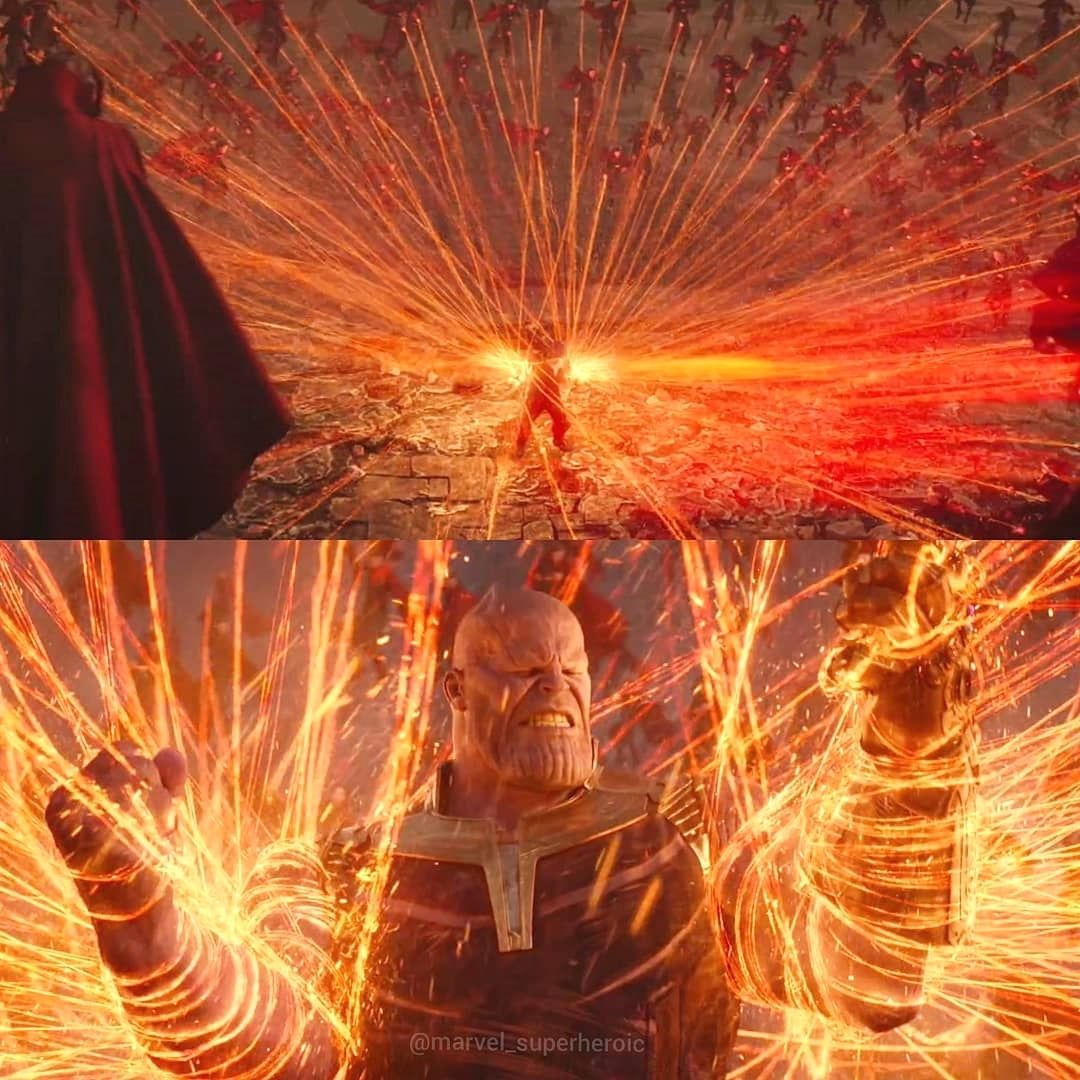

<h3 style='font-size:3rem;color:blue;'>Here just think about replacing Thanos with ESGF webside </h3>

<h3 style='font-size:3rem;color:blue;'>then we are doing the same what Dr. Strange done here</h3>

<h1 style='font-size:3rem;color:red;'>recheck all files are OK or not </h1>


## Make new list of failed links

In [117]:
testing_list=[] # to make clear any of the file got corrupted

In [123]:
######################################################
##           Checking for corrupted files           ##
######################################################

from cdo import *   # python version
cdo = Cdo()
import itertools
from os import listdir
from os.path import isfile, join
import re
import glob
import os
import shutil
import os.path
count_row = len(df_backup)
not_downloaded=0
crashed_years=0
new_set=[]
def checkYear(year):
    return (((year % 4 == 0) and (year % 100 != 0)) or (year % 400 == 0));
##############################################
##                 for CMIP6                ##
##############################################
for i in tqdm(range(count_row)):
#for i in range(676, 4961, 1):


    url = df_backup[i]
    spl = urlparse.urlsplit(url)

    fname = spl.path.split("/")[-1]   #splitting filename from URL
    fname = fname.rstrip("\n")
#    fname = fname.lstrip("\n")
#    print(fname)
    
    kp = urlparse.urlsplit(fname)
    ##############


    freq = kp.path.split("_")[1] ####extracting time frquency from URL
#    print('freq folder is ',freq)
    
    model = kp.path.split("_")[-5]  #extracting model name
#    print('model is ',model)
    
    ensemble = kp.path.split("_")[-3]    #extracting ensemble folder
#    print('ensemble folder is ',ensemble)    

    var = kp.path.split("_")[0]
#    print('variable folder is ',var)

    grid = kp.path.split("_")[-2] ####extracting grid
#    print('grid is ', grid)


    scenario = kp.path.split("_")[-4]    #extracrting scenario 
#    print('scenario folder is ',scenario)

    folder = model +'_'+scenario+'_'+ ensemble +'_'+ grid
#    print(folder)


 


    directory = f'{root_fldr}raw_data/{freq}/{var}/{scenario}/{model}/';Path(directory).mkdir(parents=True, exist_ok=True)
#    print(directory)
    

    filename = directory+fname  
#     print('full filename = ' , filename)
    ###################################################
    ###################################################
    print(colored(f' completed {((i+1)/count_row)*100} %', 'red'))
    if os.path.exists(filename):
        try:
            start_yr=int(cdo.showyear(input=filename)[0].split()[0]) #starting year and ending year 
            end_yr=int(cdo.showyear(input=filename)[0].split()[-1])  #retrive using cdoPython
            for yr in range(start_yr,end_yr+1,1): # in each year timesteps deciding
                days=0
#                 if checkYear(yr):                 # if it is a leapyear
#                     days+=366                      # days=366
#                 else:
#                     days+=365
            days=(end_yr-start_yr+1)*12 # for monthly data use this command, if day data you are downloaded uncomment above 4 lines and comment this line
            #print(f' doing {fname} for year {yr}')
            cdo.sinfo(input=filename) # just for proper working of 'except' statement
            if days > (int((cdo.ndate(input=f' {filename}'))[0])): #if timesteps is less 
                print(f'filename {fname} is corrupted')       #than we given
                crashed_years=crashed_years+1
                new_set.append(df_backup[i]) # appending that url to another list
                os.remove(filename)          # And removing that corresponding corrupted file
                break # Breaking that loop and will not check rest of the years in that file
                
            print(f'for {fname} there is {days} time steps in {fname}')
        except CDOException: # If file is corrupted, it may end with CDOException
            new_set.append(df_backup[i])
            os.remove(filename)
            pass
        except FileNotFoundError:
            new_set.append(df_backup[i])
            os.remove(filename)
            pass
                
                
    if not os.path.exists(filename): # if  path does not exists
        new_set.append(df_backup[i]) # again appending to new list
        not_downloaded=not_downloaded+1
        
new_set
failed_df = []
[failed_df.append(x) for x in new_set if x not in failed_df] #renaming list and avoiding duplications
count_row=len(failed_df)
print('number of links to download again= ',count_row)

print('number of files didnt downloaded = ', not_downloaded)

  0%|          | 0/14 [00:00<?, ?it/s]

 completed 7.142857142857142 %
for tos_Omon_ACCESS-ESM1-5_historical_r1i1p1f1_gn_185001-201412.nc there is 1980 time steps in tos_Omon_ACCESS-ESM1-5_historical_r1i1p1f1_gn_185001-201412.nc
 completed 14.285714285714285 %
 completed 21.428571428571427 %
for tos_Omon_ACCESS-ESM1-5_historical_r1i1p1f1_gn_185001-201412.nc there is 1980 time steps in tos_Omon_ACCESS-ESM1-5_historical_r1i1p1f1_gn_185001-201412.nc
 completed 28.57142857142857 %
 completed 35.714285714285715 %
 completed 42.857142857142854 %
 completed 50.0 %
for tos_Omon_ACCESS-ESM1-5_historical_r1i1p1f1_gn_185001-201412.nc there is 1980 time steps in tos_Omon_ACCESS-ESM1-5_historical_r1i1p1f1_gn_185001-201412.nc
 completed 57.14285714285714 %
for tos_Omon_ACCESS-ESM1-5_historical_r1i1p1f1_gn_185001-201412.nc there is 1980 time steps in tos_Omon_ACCESS-ESM1-5_historical_r1i1p1f1_gn_185001-201412.nc
 completed 64.28571428571429 %
 completed 71.42857142857143 %
 completed 78.57142857142857 %
 completed 85.71428571428571 %
 comp

## Redownload failed links

In [127]:
####################################################################
## redownload using the above same shell,but using list failed_df ##
####################################################################
from joblib import Parallel, delayed
import multiprocessing

#inputs = range(count_row) 

inputs = range(count_row) 
def processInput(i):
    url = failed_df[i]# Run with failed_df (list of failed links)
    
    

    
    
############################################
#           splitting foldrs               #
############################################
    spl = urlparse.urlsplit(url)

    fname = spl.path.split("/")[-1]   #splitting filename from URL
    fname = fname.rstrip("\n")
#    fname = fname.lstrip("\n")
#    print(fname)

    kp = urlparse.urlsplit(fname)
    ##############

    freq = kp.path.split("_")[1] ####extracting time frquency from URL
#    print('freq folder is ',freq)

    model = kp.path.split("_")[-5]  #extracting model name
#    print('model is ',model)

    ensemble = kp.path.split("_")[-3]    #extracting ensemble folder
#    print('ensemble folder is ',ensemble)    

    var = kp.path.split("_")[0]
#    print('variable folder is ',var)

    grid = kp.path.split("_")[-2] ####extracting grid
#    print('grid is ', grid)


    scenario = kp.path.split("_")[-4]    #extracrting scenario 
#    print('scenario folder is ',scenario)

    folder = model +'_'+scenario+'_'+ ensemble +'_'+ grid
#    print(folder)



    directory = f'/media/akash/POSTDOC_WORK/akash_works/DATASET_main/CMIP6/download_unavailable_models_in_hpc/raw_data/{freq}/{var}/{scenario}/{model}/';Path(directory).mkdir(parents=True, exist_ok=True)
#    print(directory)

    filename = directory+fname

    print('#############################')
    print('#  Now downloading',i, 'th URL   #')
    print('#############################')
    print(url)


#####################################
##        Engine of script         ##
#####################################

    if path.exists(filename):
        try:
            @retry(urllib.error.URLError, tries=2, delay=3, backoff=2)
            def link_details(): #defining function to find detailes of link
                url1 = urllib.request.urlopen(url)
                global siz
                siz=int(url1.info()['Content-Length'])#size of file to be downloaded
            link_details()
            if int(os.path.getsize(filename)) == siz: #if a file exists and the file size is similar to the file to downloaded
                print('#############################')
                print('#',i,'th link~ ','file exists #')
                print('#############################')
                pass
            else:# if file existes but size is not similar (means file downloading crashed in between)
                try:
                    @retry(urllib.error.URLError, tries=2, delay=3, backoff=2)
                    def urlopen_with_retry(): # defining file downloading function with retry
                        return urlretrieve(url,filename)
                    urlopen_with_retry()# calling file downloading function
                    print(colored('##########################################', 'red'))
                    print(colored('#  ',i,'th link downloaded successfully  #', 'red'))
                    print(colored('##########################################', 'red'))
                except urllib.error.HTTPError as err:# giving exceptions if again resulting in errors even after retrying
                    print(i,'th link broken~ ','error code~ ',err.code)
                    pass
                except urllib.error.URLError as erro:
                    print(i,'th link with URL error ')
                    pass
                except ConnectionResetError as e:
                    print(i,'th link with ConnectionResetError');pass
                except :
                    print(i,'th link other errors');pass
        except urllib.error.HTTPError as err:# giving exceptions for links those which can't even retrive details
            print(i,'th link broken~ ','error code~ ',err.code)
        except urllib.error.URLError as erro:
            print(i,'th link with URL error ')
        except ConnectionResetError as e:
            print(i,'th link with ConnectionResetError');pass
        except :
            print(i,'th link other errors');pass
        
    else:# if file does not exists
        try:
            @retry(urllib.error.URLError, tries=2, delay=3, backoff=2)
            def urlopen_with_retry():
                return urlretrieve(url,filename)
                print('calling urlopen_with_retry')
                print('please wait urlopen retrying...')
            urlopen_with_retry()#directly calling download function
            print(colored('##########################################', 'red'))
            print(colored('#  ',i,'th link downloaded successfully  #', 'red'))
            print(colored('##########################################', 'red'))
        except urllib.error.HTTPError as err: # giving exceptions for HTTPError and URLError
            print(i,'th link broken~ ','error code~ ',err.code)
            pass
        except urllib.error.URLError as erro:
            print(i,'th link with URL error ')
            pass
        except ConnectionResetError as e:
            print(i,'th link with ConnectionResetError');pass
        except :
            print(i,'th link other errors');pass

num_cores = multiprocessing.cpu_count() # number of cores in the processor, in our case = 96
results = Parallel(n_jobs=20)(delayed(processInput)(i) for i in inputs) # n_jobs = number of files want to download parallely
print(len(results))                                              # and calling function with parallel processing
print(results) 

print(colored('#############################################', 'red'))
print(colored('#                                           #', 'red'))
print(colored('#    Successfully downloaded failed links   #', 'red'))
print(colored('#                                           #', 'red'))
print(colored('#############################################', 'red'))


9
[None, None, None, None, None, None, None, None, None]
#############################################
#                                           #
#    Successfully downloaded failed links   #
#                                           #
#############################################


In [128]:
testing_list.append(count_row)
print(testing_list)

[9]


<h1 style='font-size:3rem;color:red;'> Script to merge all the downloaded file inside each folder and rename it </h1>

## Merging all files inside subfolders in the parent folder

In [135]:

scenarios= ['historical']
variant_label=['r1i1p1f1','r2i1p1f1','r3i1p1f1'] # give all variant labels you tried to download
rootDir=f'{root_fldr}raw_data/'
out_fldr = f'{root_fldr}merged_data/'
variables=['tos']




import os
from glob import glob
def create_subset_with_keyword(main_set, keyword):
    subset = [element for element in main_set if keyword in element]
    return subset

def listdirs(folder): #listing folders inside a parent folder
    return [d for d in os.listdir(folder) if os.path.isdir(os.path.join(folder, d))]
crashed_models=[]
for var in (variables):
    for scenario in (scenarios):
        parent_fldr = f'{root_fldr}raw_data/Omon/{var}/{scenario}/'
        sub_folder = [y for x in os.walk(parent_fldr) for y in glob(os.path.join(x[0], ))]
        #result = [y for x in os.walk(parent_fldr) for y in glob(os.path.join(x[0], '*.nc'))]
        print(sub_folder,'\n') #;print(result,'\n')
        for sub_foldr in tqdm(sub_folder):
            print('Doing operation inside folder ',sub_foldr)    

            ####################################
            #Picking files from sub folders
            onlyfiles = [f for f in listdir(sub_foldr) if isfile(join(sub_foldr, f))]; onlyfiles= create_subset_with_keyword(onlyfiles, '.nc'); onlyfiles= create_subset_with_keyword(onlyfiles, '_gn_'); 
            for variant in variant_label:
                variant_files= create_subset_with_keyword(onlyfiles, variant)
                
                if len(variant_files) >= 1: # if number of files inside a model folder is non zero
                    years=[] # empty list of years
                    for ii in range(len((variant_files))):
                        years.append( int(((variant_files[ii].split('_')[-1]).split('.')[0]).split('-')[0]))
                        years.append( int(((variant_files[ii].split('_')[-1]).split('.')[0]).split('-')[1]))

                    yrmax = (max(years)) #finding maximum and minmum time period(years 6digit) to rename merged file
                    yrmin = (min(years))
                    #print(f'for {variant_files} yearmin and max = {yrmin}, {yrmax}')
                    in_f_name = (' ').join([f"{sub_foldr}/" + x for x in variant_files]) #in_f_name -> to give as input files for timmerge or copying 
                    out_f_name= out_fldr+('_').join(variant_files[0].split('_')[:-1])+f'_{yrmin}-{yrmax}.nc' #out_f_name -> to give as output filename for timmerge or copying 
                    #print(f'in_f_name= {in_f_name}, out_f_name= {out_f_name}')
                    ss=', ' ; print(f'going to merge {(ss).join(variant_files)} to {out_f_name}')



#                 ###############################################
#                 ###############################################
#                 ###############################################
                    if len(variant_files) == 1: # Just copying file to out_fldr, if only a single file is there
                        print(f'in_f_name= {in_f_name}, out_f_name= {out_f_name}')
                        shutil.copy2(in_f_name,out_f_name)
                        
                    if len(variant_files) > 1: # if no. of files inside model folder >1 :
                        try:
                            cdo.mergetime(input=in_f_name, output=out_f_name) # try to merge file using cdoPython
                            print(colored(f'✓✓✓ Meged above mentioned {len(variant_files)} files to {out_f_name} ✓✓✓', 'green'))
                        except:
                            print(colored(f'✘✘✘ The files inside {sub_foldr} are incomplete ✘✘✘', 'red')) # except if, any of the file is corrupted
                            crashed_models.append(in_f_name)
                    print('\n \n \n ')
                    print('Successfully merged/copied and saved as', out_f_name)
                    print('\n \n \n ')
                else: # if number of files inside model folder is zero
                    print('Folder ',sub_foldr,' is empty')
                    pass
        print(colored('#############################################', 'green'))
        print(colored('#                                           #', 'green'))
        print(colored('#        Successfully completed Merging     #', 'green'))
        print(colored('#                                           #', 'green'))
        print(colored('#############################################', 'green'))

['/media/akash/POSTDOC_WORK/akash_works/DATASET_main/CMIP6/download_unavailable_models_in_hpc/raw_data/Omon/tos/historical/', '/media/akash/POSTDOC_WORK/akash_works/DATASET_main/CMIP6/download_unavailable_models_in_hpc/raw_data/Omon/tos/historical/GFDL-CM4', '/media/akash/POSTDOC_WORK/akash_works/DATASET_main/CMIP6/download_unavailable_models_in_hpc/raw_data/Omon/tos/historical/GFDL-ESM4', '/media/akash/POSTDOC_WORK/akash_works/DATASET_main/CMIP6/download_unavailable_models_in_hpc/raw_data/Omon/tos/historical/ACCESS-ESM1-5', '/media/akash/POSTDOC_WORK/akash_works/DATASET_main/CMIP6/download_unavailable_models_in_hpc/raw_data/Omon/tos/historical/GISS-E2-1-G', '/media/akash/POSTDOC_WORK/akash_works/DATASET_main/CMIP6/download_unavailable_models_in_hpc/raw_data/Omon/tos/historical/BCC-CSM2-MR'] 



  0%|          | 0/6 [00:00<?, ?it/s]

Doing operation inside folder  /media/akash/POSTDOC_WORK/akash_works/DATASET_main/CMIP6/download_unavailable_models_in_hpc/raw_data/Omon/tos/historical/
Folder  /media/akash/POSTDOC_WORK/akash_works/DATASET_main/CMIP6/download_unavailable_models_in_hpc/raw_data/Omon/tos/historical/  is empty
Folder  /media/akash/POSTDOC_WORK/akash_works/DATASET_main/CMIP6/download_unavailable_models_in_hpc/raw_data/Omon/tos/historical/  is empty
Folder  /media/akash/POSTDOC_WORK/akash_works/DATASET_main/CMIP6/download_unavailable_models_in_hpc/raw_data/Omon/tos/historical/  is empty
Doing operation inside folder  /media/akash/POSTDOC_WORK/akash_works/DATASET_main/CMIP6/download_unavailable_models_in_hpc/raw_data/Omon/tos/historical/GFDL-CM4
going to merge tos_Omon_GFDL-CM4_historical_r1i1p1f1_gn_197001-198912.nc, tos_Omon_GFDL-CM4_historical_r1i1p1f1_gn_199001-200912.nc, tos_Omon_GFDL-CM4_historical_r1i1p1f1_gn_201001-201412.nc to /media/akash/POSTDOC_WORK/akash_works/DATASET_main/CMIP6/download_unavai

In [ ]:
print(f'there is {len(crashed_models)} number of crashed models')
print('crashed models are ',crashed_models)

# # Making table of models inside the merged folder

In [ ]:
import pandas as pd
from cdo import *   # python version
cdo = Cdo()
import itertools
from os import listdir
from os.path import isfile, join
import re
import glob
import os
import shutil
parent_fldr=f'{root_fldr}/merged_data/'
os.chdir(parent_fldr)
myFiles = glob.glob('*.nc')
myFiles.sort()
df = pd.DataFrame(columns = ['Models', 'Ensembles', 'Period','Variable','Grid'])
var='tos'


for file in myFiles:
    f=file.split('.')[0]
    print(f)
    
    model=f.split('_')[2]
#     print('model is ',model)
    ensemble=f.split('_')[4]
#     print('ensemble is ',ensemble)
    period=f.split('_')[-1]
#     print('Period is ', period)
    var=f.split('_')[0]
#     print('variable is ',var)
    grid=f.split('_')[5]
#     print('Grid is ', grid)
    scenario=f.split('_')[3]
    print('scenario is ', scenario)

    df=df.append({'Models':model,
                  'Ensembles':ensemble,
                  'Scenario':scenario,
                  'Period':period,
                  'Variable':var,
                  'Grid':grid},ignore_index = True)


    
df=df.sort_values(by=['Models','Variable','Ensembles','Scenario']).reset_index(drop=True)
df.to_csv(f'{var}.mon.CMIP6.hist.table.csv', index=False)


print(len(df))

In [137]:
df

,Models,Ensembles,Period,Variable,Grid,Scenario
0,ACCESS-ESM1-5,r1i1p1f1,185001-201412,tos,gn,historical
1,BCC-CSM2-MR,r1i1p1f1,185001-201412,tos,gn,historical
2,GFDL-CM4,r1i1p1f1,197001-201412,tos,gn,historical
3,GFDL-ESM4,r1i1p1f1,197001-201412,tos,gn,historical
4,GISS-E2-1-G,r1i1p1f1,195101-201412,tos,gn,historical


In [138]:
df

,Models,Ensembles,Period,Variable,Grid,Scenario
0,ACCESS-ESM1-5,r1i1p1f1,185001-201412,tos,gn,historical
1,BCC-CSM2-MR,r1i1p1f1,185001-201412,tos,gn,historical
2,GFDL-CM4,r1i1p1f1,197001-201412,tos,gn,historical
3,GFDL-ESM4,r1i1p1f1,197001-201412,tos,gn,historical
4,GISS-E2-1-G,r1i1p1f1,195101-201412,tos,gn,historical


# Completed downloading above files